In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import json


In [2]:
json_path = r"D:\FracAtlas_extracted\FracAtlas\Annotations\VGG JSON\VGG_fracture_masks.json"
images_folder =  r"D:\FracAtlas_extracted\FracAtlas\images\Fractured"

In [4]:
print("loading annotation file")
with open(json_path, "r") as f:
    annotations = json.load(f)
print("✅ JSON loaded successfully!")

loading annotation file
✅ JSON loaded successfully!


In [5]:
#--- Get first 5 images from fractured folder ---
image_files = sorted(os.listdir(images_folder))[:5]
print(f"📸 Found {len(image_files)} fractured images. Taking first 5: {image_files}")


📸 Found 5 fractured images. Taking first 5: ['IMG0000019.jpg', 'IMG0000025.jpg', 'IMG0000044.jpg', 'IMG0000057.jpg', 'IMG0000058.jpg']



🔹 Processing Image 1: IMG0000019.jpg


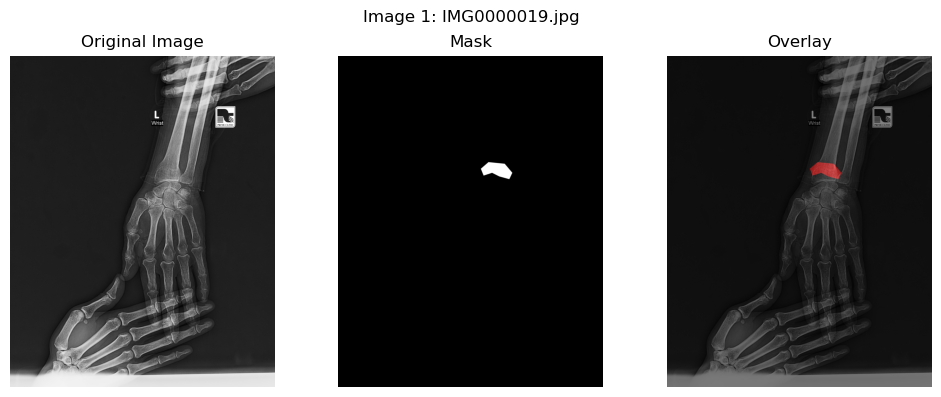

✅ Done with IMG0000019.jpg

🔹 Processing Image 2: IMG0000025.jpg


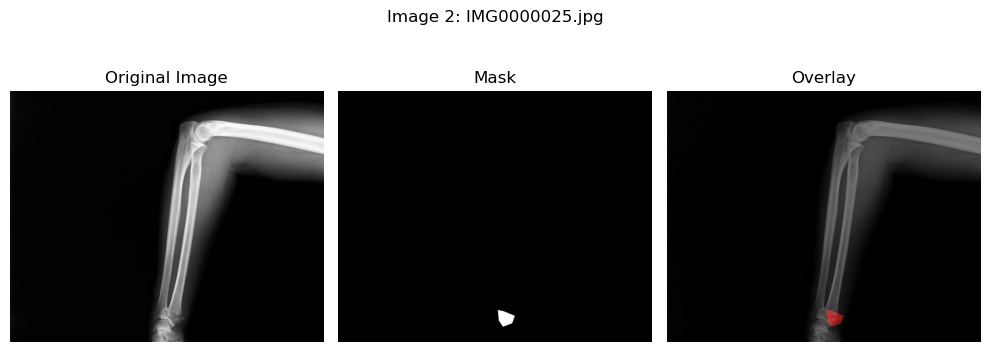

✅ Done with IMG0000025.jpg

🔹 Processing Image 3: IMG0000044.jpg


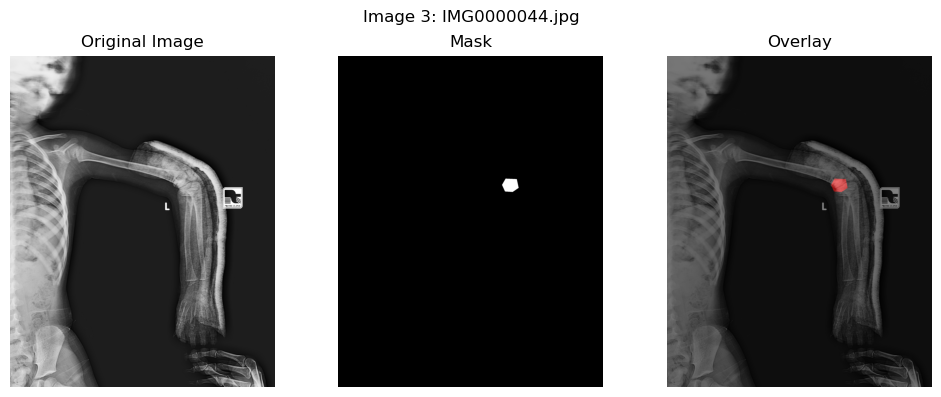

✅ Done with IMG0000044.jpg

🔹 Processing Image 4: IMG0000057.jpg


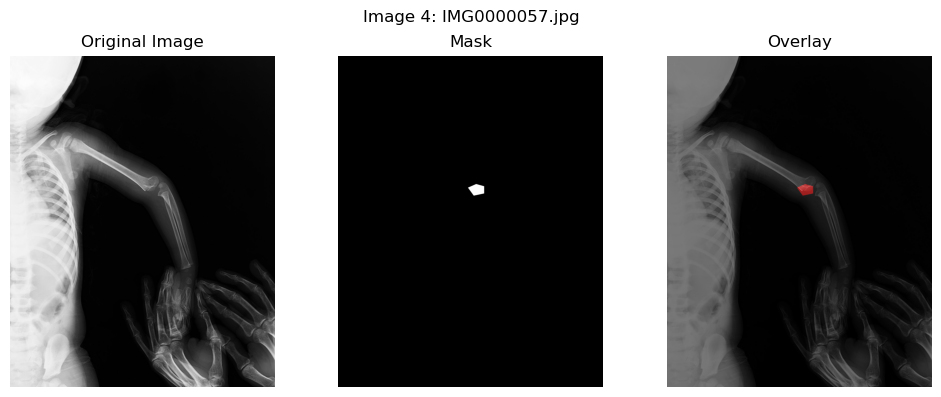

✅ Done with IMG0000057.jpg

🔹 Processing Image 5: IMG0000058.jpg


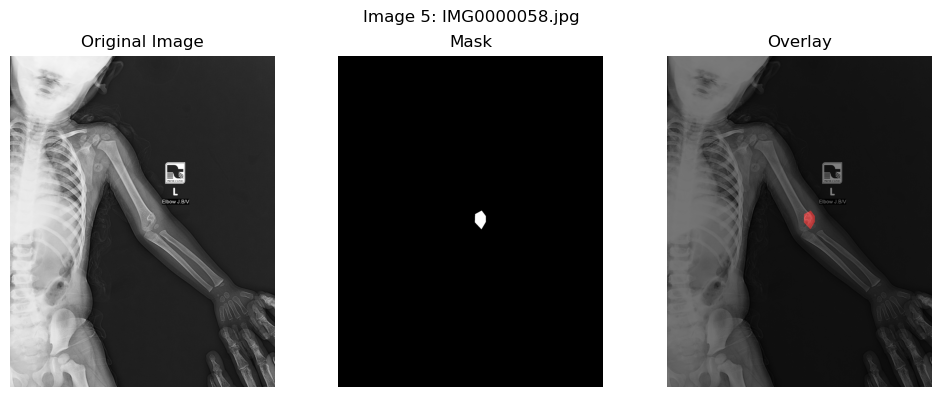

✅ Done with IMG0000058.jpg


In [6]:
# --- Process each image ---
for idx, image_file in enumerate(image_files, start=1):
    print(f"\n🔹 Processing Image {idx}: {image_file}")

    image_path = os.path.join(images_folder, image_file)
    img_bgr = cv2.imread(image_path)
    if img_bgr is None:
        print(f"⚠️ Skipping {image_file}, could not read image.")
        continue

    image = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    height, width = image.shape[:2]

    # Empty mask
    mask = np.zeros((height, width), dtype=np.uint8)

    # Get annotation for this image
    ann = annotations.get(image_file)
    if ann is None:
        print(f"⚠️ No annotation found for {image_file}, skipping...")
        continue

    regions = ann["regions"]

    # Draw polygons
    for region in regions.values():
        shape_attr = region["shape_attributes"]
        label = region['region_attributes'].get('label', 'unknown')

        if shape_attr["name"] == "polygon":
            all_x = shape_attr["all_points_x"]
            all_y = shape_attr["all_points_y"]

            polygon = np.array(list(zip(all_x, all_y)), dtype=np.int32)
            polygon = polygon.reshape((-1, 1, 2))

            mask = cv2.fillPoly(mask, [polygon], 1)

    # Colored mask
    colored_mask = np.zeros_like(image)
    colored_mask[mask == 1] = [255, 0, 0]  # Red for fracture

    # Overlay
    alpha = 0.5
    overlay = cv2.addWeighted(image, 1 - alpha, colored_mask, alpha, 0)

    # Show results
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 3, 1)
    plt.imshow(image)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(mask, cmap='gray')
    plt.title("Mask")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.imshow(overlay)
    plt.title("Overlay")
    plt.axis("off")

    plt.suptitle(f"Image {idx}: {image_file}", fontsize=12)
    plt.tight_layout()
    plt.show()

    print(f"✅ Done with {image_file}")